# Breast Cancer Survival Time after Diagnosis  
####  Linear Model, LASSO, Cross Validation

Data source:  U.S. Department of Health and Human Services, National Institutes of Health, National Cancer Institute  
Surveillance, Epidemiology, and End Results (SEER) Program - Incidences of Breast Cancer  
https://seer.cancer.gov/    

The purpose of this data frame is to clean and censor the data set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns

In [2]:
df = pd.read_csv('./data/set.csv')

In [3]:
df2 = df[(df.srv_time_mon < 998)]

In [4]:
df3 = df2[df2.VSRTSADX == 1]

In [5]:
censor = ['CODPUB', 'CODPUBKM', 'STAT_REC', 'VSRTSADX', 'ODTHCLASS', 
          'srv_time_mon_flag']
df4 = df3.drop(censor, axis=1)

In [6]:
df4['PRIMSITE_coded'] = df4['PRIMSITE'].astype(str).str[-1:]


In [7]:
df4.drop('PRIMSITE', axis=1, inplace=True)

In [8]:
df5 = df4.drop('Unnamed: 0', axis=1)

In [9]:
df6 = df5[df5.AGE_DX != 999]

In [10]:
#The current data is in months of survival after diagnosis, the following cells
#create a log odds column
d = np.array(df6.srv_time_mon)
unique, counts = np.unique(d, return_counts=True)
s = np.asarray((unique, counts)).T

cumlative = np.cumsum(s[:,1]).reshape(-1,1)
s = np.append(s, cumlative, axis=1)
denom = np.empty(len(s))
denom.fill(len(df6))
p = 1-(np.cumsum(s[:,1]) / (denom+1)).reshape(-1,1)
s = np.append(s, p, axis=1)


In [11]:
key = s[:,0]
value = s[:,3]
count = s[:,1]
hazards = dict()
count_dict = dict()
for i in range(len(s)):
    d = {key[i]:value[i]}
    hazards.update(d)
for i in range(len(s)):
    d = {key[i]:count[i]}
    count_dict.update(d)

In [12]:
#Log odd column
df6['p_srv'] = df6['srv_time_mon'].map(hazards)
df6['c_srv'] = df6['srv_time_mon'].map(count_dict)
df6['log_odds'] = np.log(df6['p_srv'] / (1 - df6['p_srv']))


C:\Users\rgorh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\rgorh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\rgorh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

PUBCSNUM   REG  MAR_STAT  RACE1V  NHIADE  SEX  AGE_DX  YR_BRTH  \
log_odds                                                                     
-11.834821    145407  1501         4       1       0    2      41     1932   
-11.141666  13040177  1520         2       1       0    2      45     1929   
-10.736194   7050314  1502         2       1       0    2      36     1938   
-10.448504     79356  1501         1       1       0    2      29     1938   
-10.043025  23012582  1522         2       1       0    2      40     1927   
-9.755328      85160  1501         2       4       0    2      43     1931   
-9.637538    7039958  1502         2       2       0    2      33     1939   
-9.532170   23048499  1522         4       1       0    2      40     1933   
-9.349834   30025808  1525         2       1       0    2      41     1934   
-9.269784      74405  1501         2       1       0    2      45     1928   
-9.126669    7082617  1502         2       1       0    2      49     1923   
-9.001491    7087288  1502         2       1       0    2      45     1930   
-8.944326      79099  1501         2       1       0    2      43     1922   
-8.790153      39690  1501         2       1       0    2      43     1927   
-8.699167   21027443  1521         2       7       0    2      48     1924   
-8.656600   21014134  1521         2       1       0    2      45     1919   
-8.576543     147037  1501         2       1       0    2      36     1932   
-8.502420   10003807  1502         2       1       0    2      47     1928   
-8.467322      56603  1501         2       1       0    2      43     1926   
-8.338081   13032487  1520         1       1       0    2      47     1918   
-8.251048    7068511  1502         2       1       0    2      52     1918   
-8.196966   13063589  1520         4       1       0    2      50     1924   
-8.170983     140644  1501         2       1       0    2      40     1919   
-8.050319      73161  1501         1       1       0    2      32     1925   
-8.005853      54554  1501         1       1       0    2      35     1912   
-7.809070   13084331  1520         2       1       0    2      43     1929   
-7.773964      66391  1501         2       1       0    2      47     1924   
-7.740048   30069825  1525         4       1       0    2      44     1933   
-7.723512    7042248  1502         2       1       0    2      53     1910   
-7.691236   13021953  1520         2       2       0    2      50     1919   
...              ...   ...       ...     ...     ...  ...     ...      ...   
 0.668482        575  1501         1       1       0    1      21     1884   
 0.717995       6881  1501         1       1       0    1      19     1880   
 0.767428       3060  1501         1       1       0    1      23     1881   
 0.817943         75  1501         1       1       0    1      18     1880   
 0.868458       1190  1501         1       1       0    1      23     1883   
 0.921817        922  1501         1       1       0    1      25     1884   
 0.976906        584  1501         1       1       0    1      19     1883   
 1.033069       1563  1501         1       1       0    1      22     1883   
 1.096478      21397  1501         1       1       0    1      23     1878   
 1.155383        150  1501         1       1       0    1      20     1876   
 1.220187       4988  1501         1       1       0    1      21     1881   
 1.283558        993  1501         1       1       0    1      18     1883   
 1.353860       6430  1501         1       1       0    1      24     1882   
 1.424603      12009  1501         1       1       0    1      19     1878   
 1.499085        958  1501         1       1       0    1      24     1880   
 1.577980       6296  1501         1       1       0    1      21     1878   
 1.660117       8320  1501         1       1       0    1      21     1881   
 1.746144      13755  1501         1       1       0    1      21     1879   
 1.835390      23897  1501        

In [13]:
#Capture columns for analysis data
df6 = df6[['srv_time_mon', 'p_srv', 'c_srv', 'log_odds', 'REG', 'MAR_STAT', 'RACE1V', 
           'NHIADE', 'SEX', 'AGE_DX', 'SEQ_NUM', 'LATERAL', 'HISTO3V', 
           'BEHO3V', 'GRADE', 'HST_STGA', 'MALIGCOUNT', 'BENBORDCOUNT', 
           'PRIMSITE_coded']]

In [14]:
df6.to_csv('./data/censored.csv')

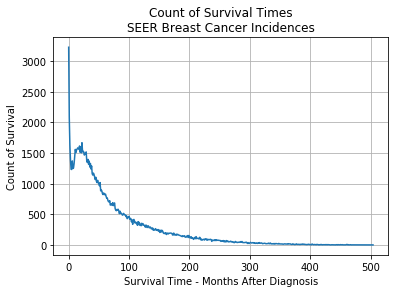

In [15]:
#Chart of count of survival time
plt.plot(unique, counts)
plt.title('Count of Survival Times\nSEER Breast Cancer Incidences')
plt.xlabel('Survival Time - Months After Diagnosis')
plt.ylabel('Count of Survival')
plt.grid()
# plt.savefig('./images/fig_1_survival_counts.png', transparent=True)
plt.show()


In [21]:
#matrix plot to see correlations
from pandas.plotting import scatter_matrix
scatter_matrix(df6, figsize=(160,120), alpha = 0.3)
plt.savefig('./images/fig_matrix.png', transparent=True)

In [ ]:
#Make dummy columns for analysis
cols = ['REG', 'MAR_STAT', 'RACE1V', 'NHIADE', 'SEX', 'SEQ_NUM', 
        'LATERAL', 'HISTO3V', 'BEHO3V', 'GRADE', 'HST_STGA', 'PRIMSITE_coded']
df6[cols] = df6[cols].astype('category')
dummies = pd.get_dummies(df6[cols])
df7 = df6.drop(cols, axis=1)
df8 = df7.join(dummies)


In [ ]:
#Plot of independent variables against dependent variable
# x = df8.drop(['srv_time_mon', 'p_srv', 'c_srv', 'log_odds'], axis=1)
# y = df8['srv_time_mon']
# for i in enumerate(x.columns):
#     plt.figure(figsize=(15,(np.floor(len(x.columns)/2)+1)*5))
#     plt.subplot(np.floor(len(x.columns)/2)+1,2,i[0]+1)
#     plt.scatter(x[i[1]], y)
#     plt.title(f'Residuals to {i[1]}')
#     plt.ylabel('Standardized Residuals')
#     plt.xlabel(f'{i[1]} values')
#     plt.grid()
#     plt.show()

In [ ]:
#Read pandas dataframe to csv
df8.to_csv('./data/dummied.csv')